In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df= pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


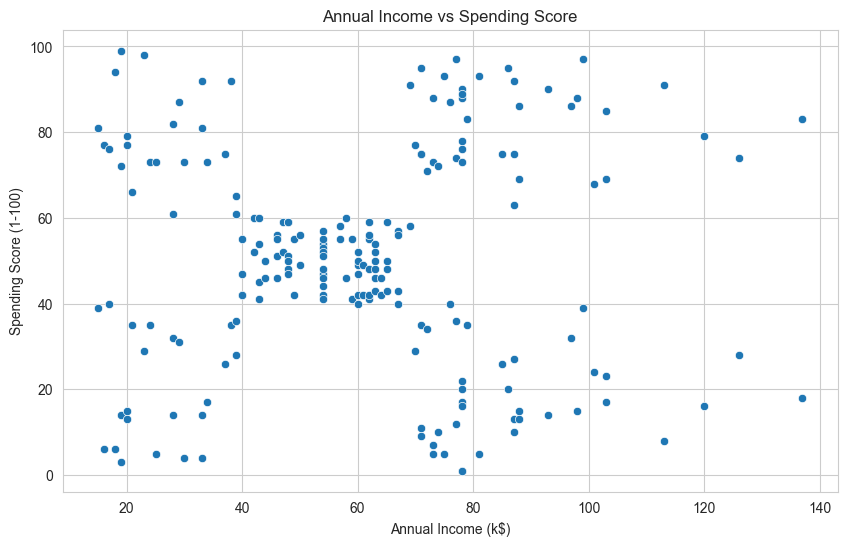

In [3]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title('Annual Income vs Spending Score')   
plt.show()

In [4]:
X=df.iloc[:,[3,4]].values
print(X[:5])

[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]


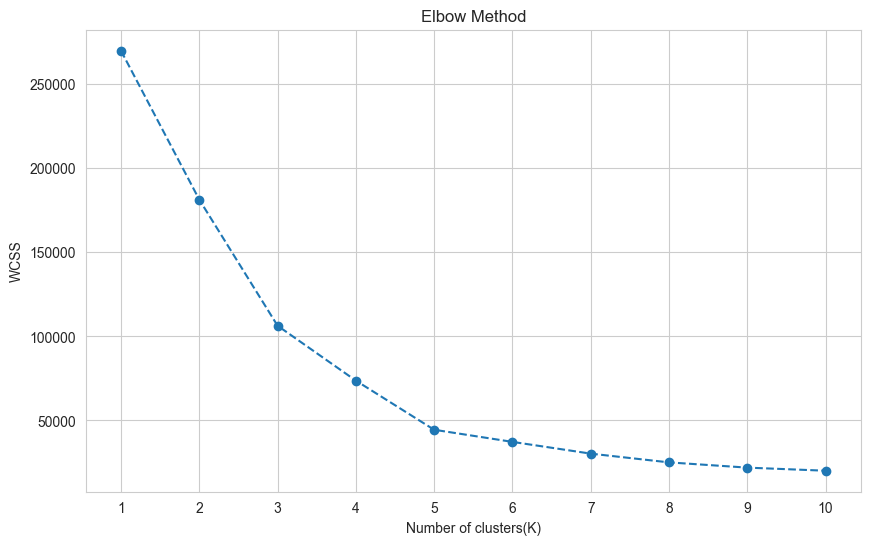

In [5]:
from sklearn.cluster import KMeans
#wcss(within-Cluster Sum of Squares) shows how compact your clusters are. Lower is better
wcss=[]
for i in range(1,11):
    #n_init=10 is used to run algo 10 times with different centroid to choose the best one
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss,marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters(K)')
plt.ylabel('WCSS')
plt.xticks(range(1,11))
plt.grid(True)
plt.show()


In [6]:
#The plot shows a steep drop from K=1 to K=5, and then the drop becomes much shallower.
#  The "elbow" is clearly at K=5, confirming our visual intuition. This is our optimal number of clusters.

In [7]:
kmeans=KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
y_kmeans=kmeans.fit_predict(X)
print(y_kmeans[:15])

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4]


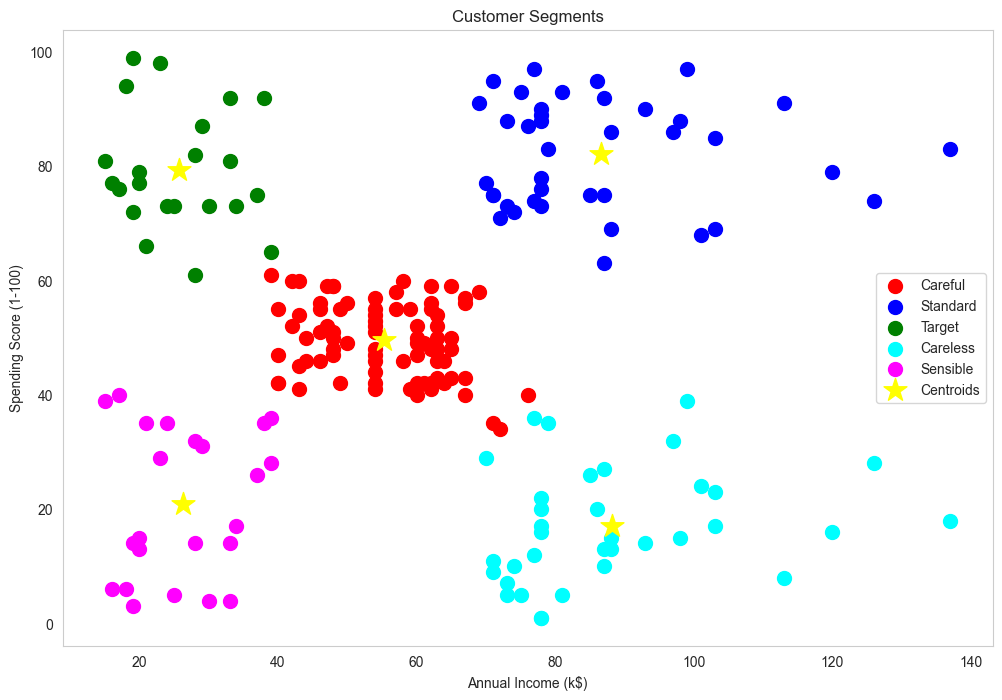

In [8]:
centroids=kmeans.cluster_centers_
#create scatter plot and plot data points,coloring them by their assigned cluster
plt.figure(figsize=(12,8))
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s=100, c='red', label='Careful')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s=100, c='blue', label='Standard')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s=100, c='green', label='Target')
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1], s=100, c='cyan', label='Careless')
plt.scatter(X[y_kmeans==4,0], X[y_kmeans==4,1], s=100, c='magenta', label='Sensible')
#plotting centroids
plt.scatter(centroids[:,0], centroids[:,1], s=300, c='yellow', label='Centroids', marker='*')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()